In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from os import path

In [3]:
def sift(p):
    i1 = cv.imread(path.join(p, "im1.jpg"))
    i2 = cv.imread(path.join(p, "im2.jpg"))

    img1 = cv.cvtColor(i1, cv.COLOR_BGR2GRAY)
    img2 = cv.cvtColor(i2, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create()

    k_1, des_1 = sift.detectAndCompute(img1, None)
    k_2, des_2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(des_1, des_2)
    matches = sorted(matches, key=lambda x: x.distance)
    img3 = cv.drawMatches(img1, k_1, img2, k_2, matches[:50], img2, flags=2)

    plt.imshow(img3)
    plt.show()

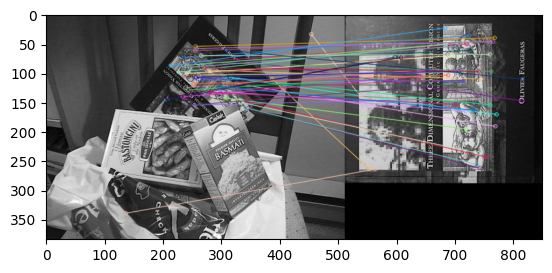

In [4]:
sift("sample")

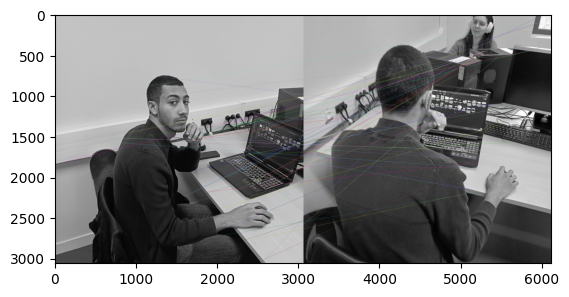

In [5]:
sift("arthur")

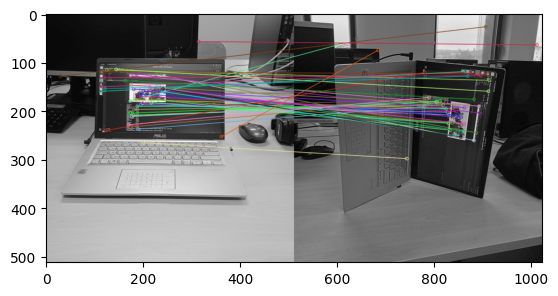

In [6]:
sift("ordi")

# Moravec

In [9]:
import numpy as np
im = cv.imread("moravec.bmp")
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

size = 11
options = [-5, -3, -1, 1, 3, 5]

def get_box(x, y):
    hsize = size // 2
    return im[x-hsize:x+hsize+1, y-hsize:y+hsize+1]

def pixel(x, y):
    box = get_box(x, y)
    configurations = []

    for a in options:
        for b in options:
            config = get_box(x+a, y+b)
            configurations.append( np.sum(np.abs(box-config)) )

    return np.min(configurations)

def moravec():
    mora = np.zeros(im.shape)
    for x in range(size, im.shape[0]-size):
        for y in range(size, im.shape[1]-size):
            mora[x, y] = pixel(x, y)

    return mora

mora = moravec()

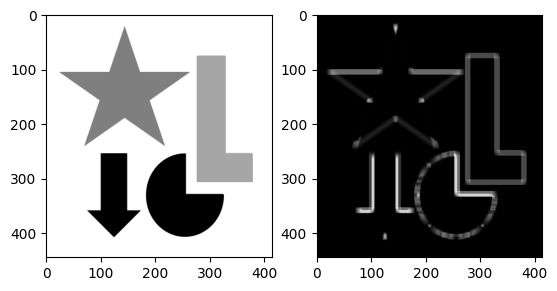

In [10]:
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(mora, cmap="gray")
plt.show()

In [ ]:
import numpy as np
im = cv.imread("moravec.bmp")
im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

